In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
train_data=pd.read_csv('/content/train_v9rqX0R.csv')
test_data=pd.read_csv('/content/test_AbJTz2l.csv')

In [3]:
#read data
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
#check the shape of data
train_data.shape

(8523, 12)

In [6]:
test_data.shape

(5681, 11)

In [7]:
#data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
#describe data
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
#check null values
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**filling missing values**

In [13]:
#check data types
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [14]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [15]:
#fill missing values in item weight by taking mean
train_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

In [16]:
test_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

In [17]:
#fill missing values in Outlet size by taking mode
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [18]:
test_data['Outlet_Size']=train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [19]:
#recheck null values
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

**managing outliers**

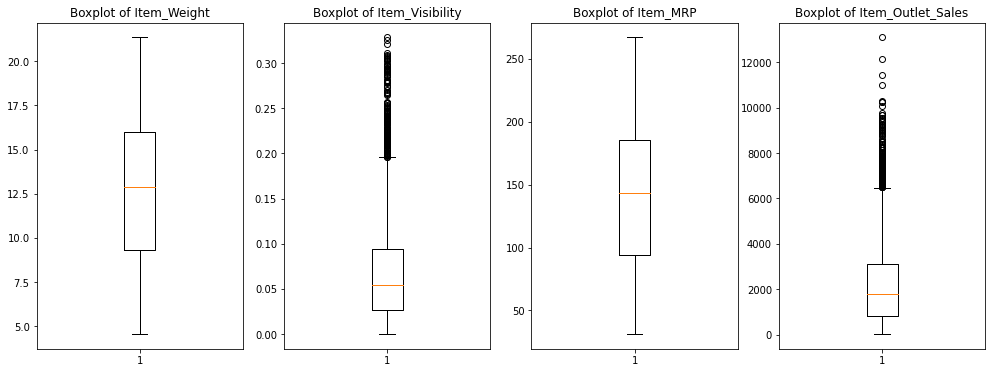

In [21]:
#boxplot for outlier detection
plt.figure(figsize=(17,6))
plt.subplot(1,4,1)
plt.boxplot(train_data['Item_Weight'])
plt.title('Boxplot of Item_Weight')
plt.subplot(1,4,2)
plt.boxplot(train_data['Item_Visibility'])
plt.title('Boxplot of Item_Visibility')
plt.subplot(1,4,3)
plt.boxplot(train_data['Item_MRP'])
plt.title('Boxplot of Item_MRP')
plt.subplot(1,4,4)
plt.boxplot(train_data['Item_Outlet_Sales'])
plt.title('Boxplot of Item_Outlet_Sales')
plt.show()

In [22]:
#find Lower Quartile (Q1), Median (Q2), Upper Quartile(Q3)
Q1=np.percentile(train_data['Item_Visibility'],25,interpolation='midpoint')
Q2=np.percentile(train_data['Item_Visibility'],50,interpolation='midpoint')
Q3=np.percentile(train_data['Item_Visibility'],75,interpolation='midpoint')

In [23]:
#print Lower Quartile (Q1), Median (Q2), Upper Quartile(Q3)
print(Q1)
print(Q2)
print(Q3)

0.0269894775
0.053930934
0.0945852925


In [24]:
#find inter quartile range
IQR=Q3-Q1
IQR

0.067595815

In [25]:
#find upper and lower limit
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR

In [26]:
#print upper and lower limit
print(low_lim)
print(upp_lim)

-0.07440424500000001
0.195979015


In [27]:
#find outliers
outlier=[]
for x in train_data['Item_Visibility']:
  if((x>upp_lim)or(x<low_lim)):
    outlier.append(x)

In [28]:
#print outliers
outlier

[0.255394896,
 0.293417759,
 0.278974075,
 0.291865402,
 0.2047,
 0.264124669,
 0.228993134,
 0.297883712,
 0.233039817,
 0.210375806,
 0.220225608,
 0.328390948,
 0.205294827,
 0.247321039,
 0.214139786,
 0.227189581,
 0.223440258,
 0.267352587,
 0.25637539,
 0.244102315,
 0.255348289,
 0.224837308,
 0.22417463,
 0.245542627,
 0.236433601,
 0.270300331,
 0.204713036,
 0.32111501,
 0.248301532,
 0.274405193,
 0.207783483,
 0.196438668,
 0.235354055,
 0.241055611,
 0.196490902,
 0.30374337,
 0.23212188,
 0.216323008,
 0.198424841,
 0.213125482,
 0.237651344,
 0.222063351,
 0.294939214,
 0.284065879,
 0.234733477,
 0.309390255,
 0.277459381,
 0.21332355,
 0.253947823,
 0.203510667,
 0.236616754,
 0.205605116,
 0.212963193,
 0.228469522,
 0.232072674,
 0.304859104,
 0.291826616,
 0.242768664,
 0.298205272,
 0.325780807,
 0.266234421,
 0.208987123,
 0.255929096,
 0.24749009,
 0.27321283,
 0.208162156,
 0.2004264,
 0.225476528,
 0.209600084,
 0.308145448,
 0.245483691,
 0.267565911,
 0.2179

In [29]:
#find the index value  with outliers
index = train_data[(train_data['Item_Visibility']>upp_lim)|(train_data['Item_Visibility']<low_lim)].index

In [30]:
#print index
index

Int64Index([  49,   83,  108,  174,  334,  434,  502,  521,  532,  680,
            ...
            7866, 7949, 8194, 8215, 8273, 8292, 8345, 8371, 8432, 8509],
           dtype='int64', length=144)

In [31]:
#find Lower Quartile (Q1), Median (Q2), Upper Quartile(Q3)
Q1=np.percentile(train_data['Item_Outlet_Sales'],25,interpolation='midpoint')
Q2=np.percentile(train_data['Item_Outlet_Sales'],50,interpolation='midpoint')
Q3=np.percentile(train_data['Item_Outlet_Sales'],75,interpolation='midpoint')

In [32]:
#print Lower Quartile (Q1), Median (Q2), Upper Quartile(Q3)
print(Q1)
print(Q2)
print(Q3)

834.2474
1794.331
3101.2964


In [33]:
#find inter quartile range
IQR=Q3-Q1
IQR


2267.049

In [34]:
#find upper and lower limit
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR

In [35]:
#print upper and lower limit
print(low_lim)
print(upp_lim)

-2566.3261
6501.8699


In [36]:
#find outliers
outlier=[]
for x in train_data['Item_Outlet_Sales']:
  if((x>upp_lim)or(x<low_lim)):
    outlier.append(x)

In [37]:
#print outliers
outlier

[6768.5228,
 7968.2944,
 6976.2524,
 7370.406,
 6704.606,
 6795.1548,
 7222.5984,
 7298.4996,
 7452.9652,
 7696.648,
 9267.936,
 7763.228,
 6911.004,
 6687.961,
 9158.079,
 8114.7704,
 7094.7648,
 7192.6374,
 6611.394,
 7443.644,
 7488.9184,
 7833.8028,
 7759.899,
 6515.5188,
 7017.532,
 7370.406,
 9133.4444,
 9275.9256,
 10236.675,
 6622.7126,
 7152.0236,
 7296.5022,
 6767.1912,
 6872.3876,
 7472.2734,
 8132.0812,
 6897.688,
 11445.102,
 7646.0472,
 6668.6528,
 6574.775,
 6942.9624,
 7073.4592,
 7130.718,
 6771.186,
 7116.0704,
 6524.84,
 6769.8544,
 6692.6216,
 6615.3888,
 7504.2318,
 7086.1094,
 7168.6686,
 6751.212,
 8239.9408,
 9371.8008,
 8851.1452,
 7478.2656,
 8604.7992,
 7590.12,
 6503.5344,
 8760.5964,
 6796.4864,
 7201.2928,
 6852.4136,
 6729.9064,
 7931.6754,
 6729.9064,
 7142.7024,
 6893.0274,
 7534.1928,
 7843.124,
 9467.676,
 8912.3988,
 6757.87,
 7247.233,
 7503.566,
 7247.233,
 8138.7392,
 7033.5112,
 7334.4528,
 6972.2576,
 6851.082,
 6641.355,
 7350.432,
 6507.5292,


In [38]:
#find the index value  with outliers
index = train_data[(train_data['Item_Outlet_Sales']>upp_lim)|(train_data['Item_Outlet_Sales']<low_lim)].index

In [39]:
#print index
index

Int64Index([  43,  130,  132,  145,  203,  240,  243,  275,  276,  304,
            ...
            7967, 8039, 8113, 8201, 8208, 8245, 8329, 8350, 8447, 8510],
           dtype='int64', length=186)

Text(0.5, 1.0, 'Boxplot of Item_MRP')

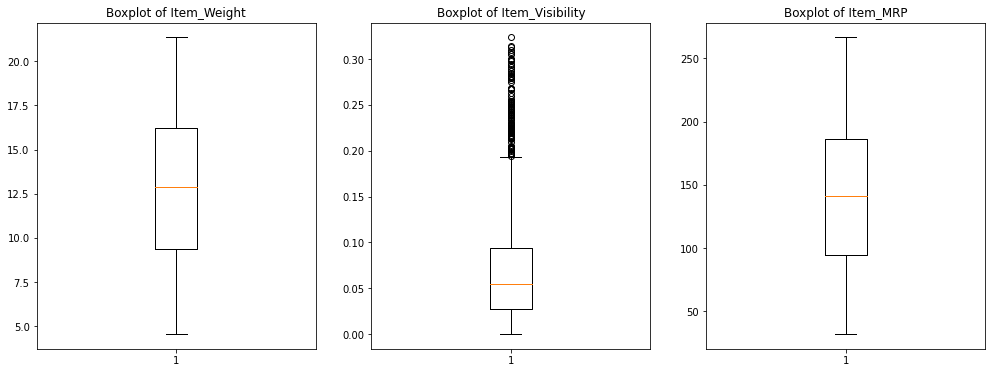

In [40]:
#boxplot for outlier detection
plt.figure(figsize=(17,6))
plt.subplot(1,3,1)
plt.boxplot(test_data['Item_Weight'])
plt.title('Boxplot of Item_Weight')
plt.subplot(1,3,2)
plt.boxplot(test_data['Item_Visibility'])
plt.title('Boxplot of Item_Visibility')
plt.subplot(1,3,3)
plt.boxplot(test_data['Item_MRP'])
plt.title('Boxplot of Item_MRP')

In [41]:
#find Lower Quartile (Q1), Median (Q2), Upper Quartile(Q3)
Q1=np.percentile(test_data['Item_Visibility'],25,interpolation='midpoint')
Q2=np.percentile(test_data['Item_Visibility'],50,interpolation='midpoint')
Q3=np.percentile(test_data['Item_Visibility'],75,interpolation='midpoint')

In [42]:
#print Lower Quartile (Q1), Median (Q2), Upper Quartile(Q3)
print(Q1)
print(Q2)
print(Q3)


0.027046875
0.054154252
0.093462623


In [43]:
#find inter quartile range
IQR=Q3-Q1
IQR

0.066415748

In [44]:
#find upper and lower limit
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR

In [45]:
#print upper and lower limit
print(low_lim)
print(upp_lim)

-0.072576747
0.193086245


In [46]:
#find outliers
outlier=[]
for x in test_data['Item_Visibility']:
  if((x>upp_lim)or(x<low_lim)):
    outlier.append(x)

In [47]:
#print outliers
outlier

[0.196897637,
 0.291322397,
 0.299544153,
 0.246178257,
 0.262504325,
 0.238990225,
 0.216762584,
 0.23372937,
 0.195963464,
 0.197679823,
 0.280083047,
 0.279663801,
 0.214306131,
 0.268966279,
 0.229678918,
 0.203400773,
 0.310376916,
 0.224472159,
 0.209684121,
 0.203536932,
 0.28704117,
 0.274592283,
 0.308258994,
 0.249342884,
 0.201643565,
 0.242768664,
 0.224830093,
 0.220221011,
 0.219568112,
 0.277579189,
 0.253421913,
 0.239568811,
 0.203400773,
 0.285077835,
 0.281955554,
 0.227609738,
 0.237725726,
 0.202948268,
 0.256919126,
 0.294472634,
 0.225662275,
 0.20473381,
 0.199825987,
 0.253947823,
 0.238868509,
 0.223633668,
 0.267753377,
 0.196267755,
 0.267701662,
 0.222132498,
 0.230246928,
 0.323637245,
 0.267106722,
 0.247843179,
 0.214952566,
 0.226084177,
 0.215728288,
 0.196572047,
 0.238579765,
 0.20192757,
 0.212767095,
 0.267339659,
 0.215072945,
 0.313541543,
 0.203588239,
 0.21471985,
 0.216601163,
 0.250008736,
 0.245136905,
 0.244163174,
 0.305724969,
 0.21991455

In [48]:
#find the index value  with outliers
index = test_data[(test_data['Item_Visibility']>upp_lim)|(test_data['Item_Visibility']<low_lim)].index

In [49]:
#print index
index

Int64Index([  19,   46,   76,   78,   89,  138,  242,  333,  352,  360,
            ...
            5157, 5175, 5277, 5290, 5435, 5469, 5482, 5514, 5571, 5668],
           dtype='int64', length=113)

In [50]:
#drop columns Item_Identifier','Outlet_Identifier
df=train_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
df1=test_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

**correlation**

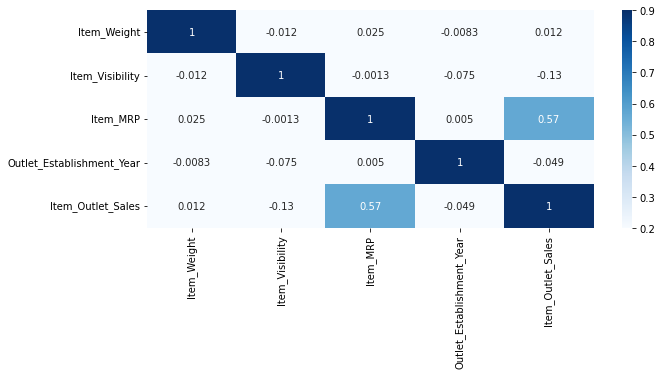

In [51]:
corrmatrix=train_data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,cmap='Blues')

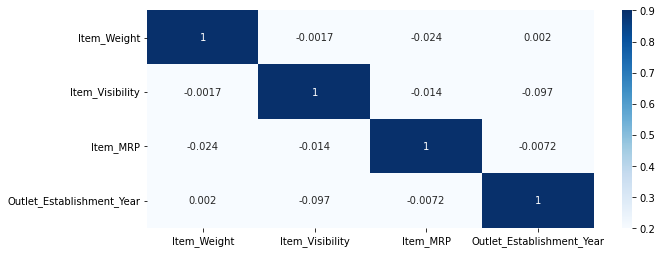

In [52]:
corrmatrix=test_data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,cmap='Blues')

**label encoding**

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
label_encoder=LabelEncoder()

In [55]:
df=train_data.apply(LabelEncoder().fit_transform)

In [56]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,1,664,4,5592,9,4,1,0,1,2540
1,8,57,2,880,14,473,3,8,1,2,2,422
2,662,376,1,715,10,2901,9,4,1,0,1,1639
3,1121,393,2,0,6,4227,0,3,1,2,0,670
4,1297,265,1,0,9,627,1,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,1,3912,13,4955,1,1,0,2,1,2047
8519,897,233,2,3278,0,2023,7,5,1,1,1,516
8520,1357,299,1,2302,8,1263,6,6,2,1,1,1018
8521,681,149,2,7175,13,1857,3,8,1,2,2,1466


In [57]:
df1=test_data.apply(LabelEncoder().fit_transform)

In [58]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,279,1,66,13,1460,9,4,1,0,1
1,1067,54,4,1714,4,965,2,7,1,1,1
2,1406,371,1,4042,11,4076,0,3,1,2,0
3,809,388,1,388,13,2522,2,7,1,1,1
4,1184,260,2,4423,4,3972,5,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,345,2,290,13,2164,8,2,1,0,1
5677,306,313,2,4815,15,2833,3,8,0,2,2
5678,1412,296,1,3256,8,1752,7,5,1,1,1
5679,517,321,2,0,3,3691,2,7,1,1,1


**EDA**

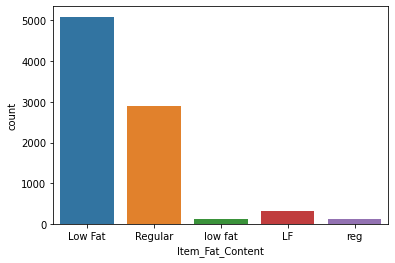

In [59]:
sns.countplot(x=train_data['Item_Fat_Content'])


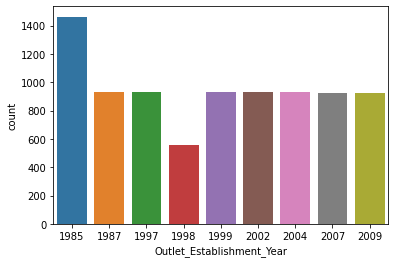

In [60]:
sns.countplot(x=train_data['Outlet_Establishment_Year'])

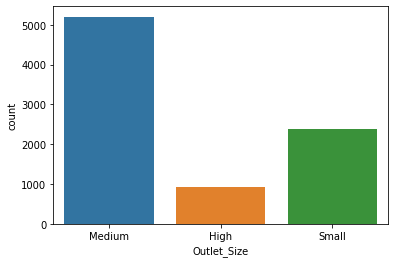

In [61]:
sns.countplot(x=train_data['Outlet_Size'])

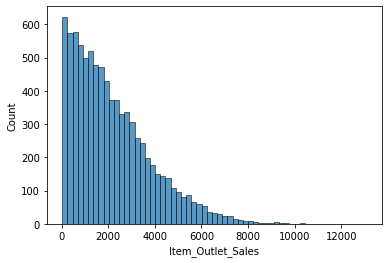

In [62]:
sns.histplot(x=train_data['Item_Outlet_Sales'])

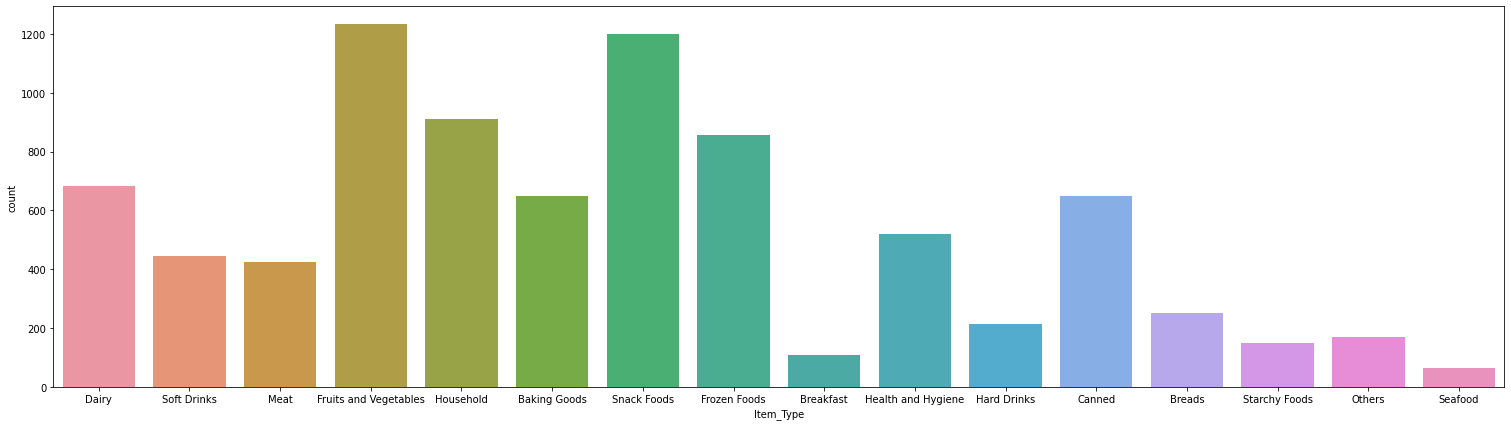

In [63]:
plt.figure(figsize=(26,7))
sns.countplot(x=train_data['Item_Type'])
plt.show()

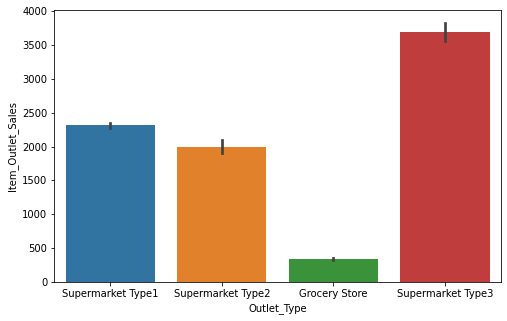

In [64]:
plt.figure(figsize=(8,5))
sns.barplot(x=train_data['Outlet_Type'],y=train_data['Item_Outlet_Sales'])

<function matplotlib.pyplot.show(*args, **kw)>

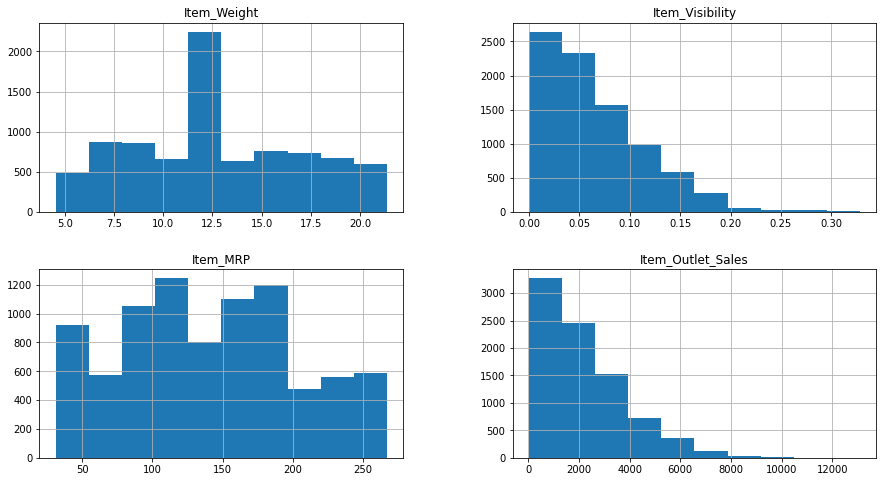

In [65]:
freqgraph=train_data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,8))
plt.show


**split train and test data**

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X=df.drop('Item_Outlet_Sales',axis=1)

In [68]:
y=df['Item_Outlet_Sales']

In [69]:
X_test = df1

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=42)

**standard scaling**

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Linear Regression**

In [72]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions_lr=model.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error,r2_score

In [74]:
print('Mean squared error is:',mean_squared_error(y_test,predictions_lr))
print('R squared value is:',r2_score(y_test,predictions_lr))
print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test,predictions_lr)))
R1 = np.sqrt(mean_squared_error(y_test,predictions_lr))

Mean squared error is: 356650.9090076467
R squared value is: 0.5666006932761389
Root Mean Square Error : 597.2025694918323


**Lasso Regression**

In [75]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)

In [76]:
model=lasso.fit(X_train,y_train)
predictions_lo=model.predict(X_test)

In [77]:
print('Mean squared error is:',mean_squared_error(y_test,predictions_lo))
print('R squared value is:',r2_score(y_test,predictions_lo))
print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test,predictions_lo)))
R2 = np.sqrt(mean_squared_error(y_test,predictions_lo))

Mean squared error is: 356517.1528699201
R squared value is: 0.5667632326553937
Root Mean Square Error : 597.0905734224248


**kNN**

In [78]:
from sklearn.neighbors import KNeighborsRegressor

In [79]:
kNN = KNeighborsRegressor(n_neighbors=10)
kNN.fit(X_train,y_train)
y_pred_kNN = kNN.predict(X_test)

In [80]:
print('Mean squared error is:',mean_squared_error(y_test,y_pred_kNN))
print('R squared value is:',r2_score(y_test,y_pred_kNN))
print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test,y_pred_kNN)))
R3 = np.sqrt(mean_squared_error(y_test,y_pred_kNN))

Mean squared error is: 313235.7294017595
R squared value is: 0.6193584692056544
Root Mean Square Error : 559.6746638912284


**Decision Tree Regressor**

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [83]:
print('Mean squared error is:',mean_squared_error(y_test,y_pred_dt))
print('R squared value is:',r2_score(y_test,y_pred_dt))
print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test,y_pred_dt)))
R4 = np.sqrt(mean_squared_error(y_test,y_pred_dt))

Mean squared error is: 332156.1813099914
R squared value is: 0.5963664887204623
Root Mean Square Error : 576.3299240105371


**Random Forest Regressor**

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [86]:
print('Mean squared error is:',mean_squared_error(y_test,y_pred_rf))
print('R squared value is:',r2_score(y_test,y_pred_rf))
print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test,y_pred_rf)))
R5 = np.sqrt(mean_squared_error(y_test,y_pred_rf))

Mean squared error is: 307916.0272016663
R squared value is: 0.6258229283932472
Root Mean Square Error : 554.9018176233218


Ada Boost Regressor 

In [87]:
from sklearn.ensemble import AdaBoostRegressor 

In [88]:
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [89]:
print('Mean squared error is:',mean_squared_error(y_test,y_pred_ada ))
print('R squared value is:',r2_score(y_test,y_pred_ada ))
print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test,y_pred_ada )))
R6 = np.sqrt(mean_squared_error(y_test,y_pred_ada ))

Mean squared error is: 314774.349048227
R squared value is: 0.6174887510267602
Root Mean Square Error : 561.0475461564973


**Model results**

In [90]:
metric_results= {'Model': ['linear Regression','lasso' ,'KNeighbors', 'Decision Tree','RandomForest','AdaBoost'], 
                 'Rmse': [R1, R2, R3,R4,R5,R6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,Rmse
0,linear Regression,597.202569
1,lasso,597.090573
2,KNeighbors,559.674664
3,Decision Tree,576.329924
4,RandomForest,554.901818
5,AdaBoost,561.047546


*Random Forest gives better result*

**Prediction**

In [91]:
sample=pd.read_csv('/content/sample_submission_8RXa3c6.csv')

In [92]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [93]:
Item_Outlet_Sales=rf.predict(X_test)

In [100]:
rf.predict(X_test)

array([1240.61307851,  747.78482901,  747.78482901, ...,  747.78482901,
        747.78482901, 1371.45980653])

In [94]:
Item_Outlet_Sales=pd.DataFrame(Item_Outlet_Sales,columns=['Item_Outlet_Sales'])

In [95]:
sample['Item_Outlet_Sales']=Item_Outlet_Sales

In [96]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1240.613079
1,FDW14,OUT017,747.784829
2,NCN55,OUT010,747.784829
3,FDQ58,OUT017,2421.018641
4,FDY38,OUT027,2225.957306


In [99]:
sample.isna().sum()

Item_Identifier         0
Outlet_Identifier       0
Item_Outlet_Sales    3976
dtype: int64

**final csv**

In [97]:
pd.DataFrame(sample).to_csv("sales_prediction.csv",index=False)